<a href="https://colab.research.google.com/github/RopeFeliz/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [8]:
urls_tiendas = {
    'Tienda1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv" ,
    'Tienda4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

def analizar_ventas_tiendas(urls_tiendas):

    resultados = []

    for nombre_tienda, url in urls_tiendas.items():
        try:
            # Leer datos de la tienda
            df_tienda = pd.read_csv(url)

            # Calcular ventas totales
            ventas_totales = df_tienda['Precio'].sum()

            # Calcular número de ventas
            num_ventas = len(df_tienda)

            # Calcular venta promedio
            venta_promedio = ventas_totales / num_ventas if num_ventas > 0 else 0

            # Agregar a resultados
            resultados.append({
                'Tienda': nombre_tienda,
                'Ventas_Totales': ventas_totales,
                'Num_Ventas': num_ventas,
                'Venta_Promedio': venta_promedio
            })

            print(f"{nombre_tienda}: Ventas totales = ${ventas_totales:,.2f}")

        except Exception as e:
            print(f"Error procesando {nombre_tienda}: {e}")
            resultados.append({
                'Tienda': nombre_tienda,
                'Ventas_Totales': 0,
                'Num_Ventas': 0,
                'Venta_Promedio': 0,
                'Error': str(e)
            })

    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)

    # Ordenar por ventas totales (de mayor a menor)
    df_resultados = df_resultados.sort_values('Ventas_Totales', ascending=False)

    # Añadir ranking
    df_resultados['Ranking'] = range(1, len(df_resultados) + 1)

    # Identificar la tienda con más ventas
    if len(df_resultados) > 0:
        mejor_tienda = df_resultados.iloc[0]
        print(f"\nLA TIENDA CON MÁS VENTAS ES: {mejor_tienda['Tienda']}")
        print(f"   Ventas totales: ${mejor_tienda['Ventas_Totales']:,.2f}")

    return df_resultados

# Ejecutar análisis
df_comparativo = analizar_ventas_tiendas(urls_tiendas)

print("\nDATAFRAME COMPARATIVO COMPLETO:")
print(df_comparativo.to_string(index=False))



Tienda1: Ventas totales = $1,150,880,400.00
Tienda2: Ventas totales = $1,116,343,500.00
Tienda3: Ventas totales = $1,098,019,600.00
Tienda4: Ventas totales = $1,038,375,700.00

LA TIENDA CON MÁS VENTAS ES: Tienda1
   Ventas totales: $1,150,880,400.00

DATAFRAME COMPARATIVO COMPLETO:
 Tienda  Ventas_Totales  Num_Ventas  Venta_Promedio  Ranking
Tienda1    1150880400.0        2359   487867.910131        1
Tienda2    1116343500.0        2359   473227.426876        2
Tienda3    1098019600.0        2359   465459.771089        3
Tienda4    1038375700.0        2358   440362.892282        4


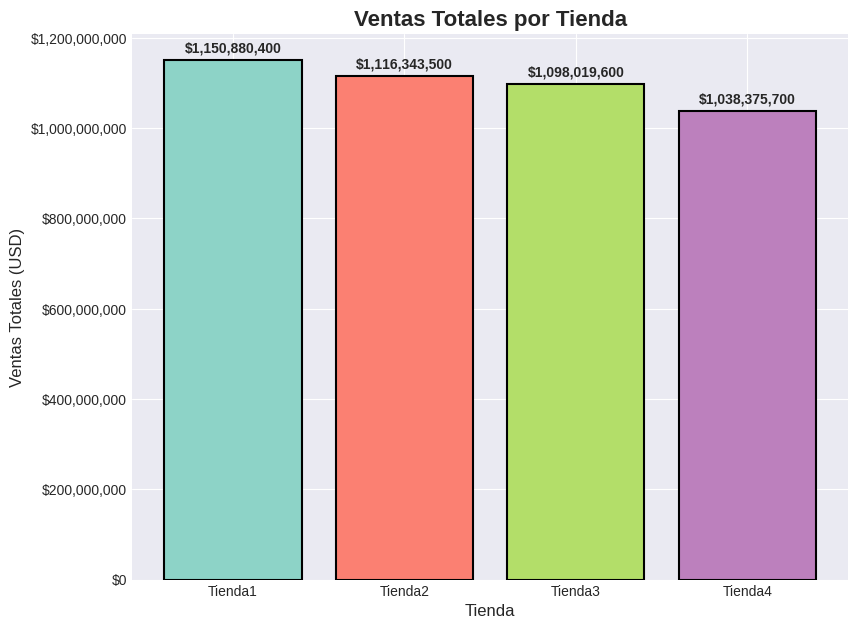

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df_resultados = pd.DataFrame(df_comparativo)
df_resultados = df_resultados.sort_values('Ventas_Totales', ascending=False)

plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 12))

# 1. GRÁFICO DE BARRAS: VENTAS TOTALES POR TIENDA
ax1 = plt.subplot(2, 2, 1)
colores = plt.cm.Set3(np.arange(len(df_resultados)) / len(df_resultados))
barras = ax1.bar(df_resultados['Tienda'], df_resultados['Ventas_Totales'],
                     color=colores, edgecolor='black', linewidth=1.5)
ax1.set_title('Ventas Totales por Tienda', fontsize=16, fontweight='bold')
ax1.set_xlabel('Tienda', fontsize=12)
ax1.set_ylabel('Ventas Totales (USD)', fontsize=12)
ax1.ticklabel_format(style='plain', axis='y')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Añadir etiquetas de valor en las barras
for barra in barras:
    yval = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2, yval + 1e7, f'${yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

# Task
Prepare the data by adding a 'Tienda' column to each individual store's DataFrame, then concatenate them into a single DataFrame. After that, calculate the total billing for each store by grouping the combined DataFrame by 'Tienda' and summing the 'Precio' column. Finally, display the total billing for each store.

## Preparar Datos para Análisis de Facturación

### Subtask:
Agregar una columna de 'Tienda' a cada DataFrame individual y luego concatenarlos en un único DataFrame.


**Reasoning**:
First, I will add a new column 'Tienda' to each of the individual DataFrames (tienda, tienda2, tienda3, tienda4) and assign the corresponding store name. Then, I will concatenate these DataFrames into a single DataFrame named `df_completo` to prepare the data for further analysis. Finally, I will display the head and info of the combined DataFrame to verify the data structure.

